<a href="https://colab.research.google.com/github/Hyunta/Bigdata/blob/main/2021_01_05_Decision_Tree01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
tennis_data = pd.read_csv("tree01.csv")

In [ ]:
tennis_data

,Outlook,Temperature,Humidity,PlayTennis
0,Sunny,Hot,High,No
1,Overcast,Hot,High,No
2,Overcast,Mild,Normal,Yes
3,Rain,Mild,Normal,Yes
4,Sunny,Mild,High,No
5,Rain,Hot,High,No
6,Overcast,Hot,Normal,No


In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace("Overcast", 1)
tennis_data.Outlook = tennis_data.Outlook.replace("Rain", 2)
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny", 0)

In [ ]:
tennis_data.Temperature = tennis_data.Temperature.replace("Hot", 1)
tennis_data.Temperature = tennis_data.Temperature.replace("Mild", 2)
tennis_data.Humidity = tennis_data.Humidity.replace("High", 1)
tennis_data.Humidity = tennis_data.Humidity.replace("Normal", 2)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No", 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("Yes", 2)

In [ ]:
tennis_data

,Outlook,Temperature,Humidity,PlayTennis
0,0,1,1,1
1,1,1,1,1
2,1,2,2,2
3,2,2,2,2
4,0,2,1,1
5,2,1,1,1
6,1,1,2,1


In [ ]:
pd.DataFrame(tennis_data, columns= ["PlayTennis"])

,PlayTennis
0,1
1,1
2,2
3,2
4,1
5,1
6,1


In [ ]:
import numpy as np

In [ ]:
y = np.array(pd.DataFrame(tennis_data, columns= ["PlayTennis"]))

In [ ]:
x = np.array(pd.DataFrame(tennis_data, columns=["Outlook", "Temperature", "Humidity"]))

In [ ]:
x

array([[0, 1, 1],
       [1, 1, 1],
       [1, 2, 2],
       [2, 2, 2],
       [0, 2, 1],
       [2, 1, 1],
       [1, 1, 2]])

In [ ]:
y

array([[1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pd.DataFrame({
    "Outlook":[2,1,0],
    "Temperature":[2,2,1],
    "Humidity":[1,1,2]
})

,Outlook,Temperature,Humidity
0,2,2,1
1,1,2,1
2,0,1,2


In [ ]:
np.array(
    pd.DataFrame({
    "Outlook":[2,1,0],
    "Temperature":[2,2,1],
    "Humidity":[1,1,2]
})
)

array([[2, 2, 1],
       [1, 2, 1],
       [0, 1, 2]])

In [ ]:
future_join = np.array(
    pd.DataFrame({
    "Outlook":[2,1,0],
    "Temperature":[2,2,1],
    "Humidity":[1,1,2]
})
)

In [ ]:
future_join

array([[2, 2, 1],
       [1, 2, 1],
       [0, 1, 2]])

In [ ]:
dt_clf.predict(future_join)

array([1, 1, 1])

In [ ]:
from sklearn import tree

In [ ]:
tree.export_graphviz(dt_clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 1.5\\ngini = 0.408\\nsamples = 7\\nvalue = [5, 2]"] ;\n1 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n2 -> 4 ;\n}'

In [ ]:
tree.export_graphviz(dt_clf,
                     feature_names=["Outlook","Temperature","Humidity"]
                     )

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.408\\nsamples = 7\\nvalue = [5, 2]"] ;\n1 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Temperature <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n2 -> 4 ;\n}'

In [ ]:
tree.export_graphviz(dt_clf,
                     feature_names=["Outlook","Temperature","Humidity"],
                     class_names=["No","Yes"])

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.408\\nsamples = 7\\nvalue = [5, 2]\\nclass = No"] ;\n1 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]\\nclass = No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Temperature <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]\\nclass = Yes"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = Yes"] ;\n2 -> 4 ;\n}'

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf,
                     feature_names=["Outlook","Temperature","Humidity"],
                     class_names=["No","Yes"])

In [ ]:
dt_dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.408\\nsamples = 7\\nvalue = [5, 2]\\nclass = No"] ;\n1 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]\\nclass = No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Temperature <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]\\nclass = Yes"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = Yes"] ;\n2 -> 4 ;\n}'

In [ ]:
import pydotplus

In [ ]:
pydotplus.graph_from_dot_data(dt_dot_data)

In [ ]:
pydotplus.graph_from_dot_data(dt_dot_data).create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x83\x00\x00\x01\xa3\x08\x06\x00\x00\x00\xce\xc8y$\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddyT\x14W\xf6\x07\xf0o\x03\r\xdd\xcd\x0e"\xa0\x80\xb2\xc4\x05\xb7\x9fK\x1cD4jf\x8c1\t.\xa0\x92\xe8L\\\x83\xa2A\\1\xe2\x82\x1b\x01\xc1\xe0D\xc1\x8cKHF3J\x14\x07\x13\x8d\xd1$\x8e;q\x89+ J4\x88\x8a\x02\n\xca.\r\xdc\xdf\x1f\x0e=\xb6\xec\xd0\xddE\xc3\xfd\x9c\xc39\xf1\xf5{U\xb70r\xa9\xaaw\xdf\x13\x11\x11\x811\xc6Xk\xb6WG\xe8\x08\x18c\x8c\t\x8f\x93\x01c\x8c1N\x06\x8c1\xc6\x00=\xa1\x03\xd0V\xdf~\xfb\xad\xd0!\xb0V\xc0\xde\xde\x1e\x03\x06\x0c\x10:\x0c\xd6\n\x88\xf8\x05r\xe3\x88D"\xa1C`\xad\x80\xb7\xb77\xf6\xee\xdd+t\x18\xac\xe5\xdb\xcbw\x06M\x10\x1b\x1b\x8b\xf1\xe3\xc7\x0b\x1d\x06k\xa1\xc6\x8d\x1b\'t\x08\xac\x15\xe1w\x06\x8c1\xc68\x190\xc6\x18\xe3d\xc0\x18c\x0c\x9c\x0c\x18c\x8c\x81\x93\x01c\x8c1p2`\x8c1\x06N\x06\x1a\x11\x17\x17\x07\'\'\'\x88D"\x88D"\xd8\xdb\xdbc\xc7\x8e\x1d\x8a\xcf\xa7M\x9b\x06sss\x88D"\x88\xc5b

In [ ]:
from IPython.display import Image

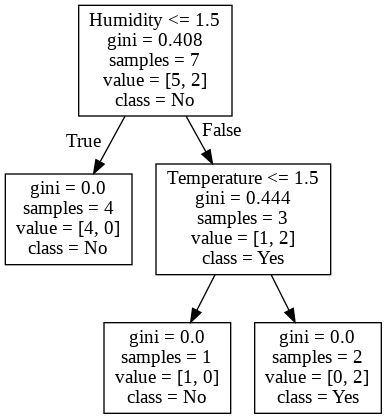

In [ ]:
Image( pydotplus.graph_from_dot_data(dt_dot_data).create_png()  )

In [ ]:
tennis_data


,Outlook,Temperature,Humidity,PlayTennis
0,0,1,1,1
1,1,1,1,1
2,1,2,2,2
3,2,2,2,2
4,0,2,1,1
5,2,1,1,1
6,1,1,2,1


In [ ]:
pd.DataFrame(tennis_data, columns=["Outlook","Temperature","Humidity"])

,Outlook,Temperature,Humidity
0,0,1,1
1,1,1,1
2,1,2,2
3,2,2,2
4,0,2,1
5,2,1,1
6,1,1,2


In [ ]:
X = np.array( pd.DataFrame(tennis_data, columns=["Outlook","Temperature","Humidity"]) )

In [ ]:
X

array([[0, 1, 1],
       [1, 1, 1],
       [1, 2, 2],
       [2, 2, 2],
       [0, 2, 1],
       [2, 1, 1],
       [1, 1, 2]])

In [ ]:
pd.DataFrame(tennis_data, columns=["PlayTennis"])

,PlayTennis
0,1
1,1
2,2
3,2
4,1
5,1
6,1


In [ ]:
y = np.array( pd.DataFrame(tennis_data, columns=["PlayTennis"]) )

In [ ]:
y

array([[1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(X, y)

[array([[1, 2, 2],
        [1, 1, 2],
        [2, 1, 1],
        [0, 2, 1],
        [0, 1, 1]]), array([[2, 2, 2],
        [1, 1, 1]]), array([[2],
        [1],
        [1],
        [1],
        [1]]), array([[2],
        [1]])]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_clf.predict(X_test)

array([2, 1])

In [ ]:
dt_prediction = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, dt_prediction)

0.5

In [ ]:
tennis_data

,Outlook,Temperature,Humidity,PlayTennis
0,0,1,1,1
1,1,1,1,1
2,1,2,2,2
3,2,2,2,2
4,0,2,1,1
5,2,1,1,1
6,1,1,2,1


In [ ]:
tennis_data.columns

Index(['Outlook', 'Temperature', 'Humidity', 'PlayTennis'], dtype='object')

In [ ]:
tennis_data.columns.tolist()

['Outlook', 'Temperature', 'Humidity', 'PlayTennis']

In [ ]:
feature_names = tennis_data.columns.tolist()[0:3]

In [ ]:
from sklearn import tree

In [ ]:
tree.export_graphviz(dt_clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 1.5\\ngini = 0.48\\nsamples = 5\\nvalue = [3, 2]"] ;\n1 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [ ]:
tree.export_graphviz(dt_clf, feature_names = feature_names)

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.48\\nsamples = 5\\nvalue = [3, 2]"] ;\n1 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [ ]:
tree.export_graphviz(dt_clf,
                     feature_names = feature_names,
                     class_names = ["Play No","Play Yes"]
                     )

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.48\\nsamples = 5\\nvalue = [3, 2]\\nclass = Play No"] ;\n1 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]\\nclass = Play No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = Play Yes"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf,
                     feature_names = feature_names,
                     class_names = ["Play No","Play Yes"]
                     )

In [ ]:
import pydotplus

In [ ]:
pydotplus.graph_from_dot_data(dt_dot_data).create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01?\x00\x00\x01\x04\x08\x02\x00\x00\x00\xd1y\xa4\x92\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\x9d}<\xd4Y\xff\xff\xcf`\xcc\x1df\x10\x92\x9b\xdc%\xe9n\xa9\xddK\xaam\xab\xefv\xa3R\xa2\xd8t]\x9b\xdd$\xddPI*\x85-)Ql\xa2}\x94\xb2{\xd1FaU\xac\xab\x9bu\x95\x94J\xa5\xdc\x14\xa9.wM\x19\xb9g\x06c\xe6\xf3\xfb\xe3<\xae\xf9\xcd\xc5\xcc4\xe6\xc6\x18\xce\xf3/\x9fs\xce\xe7\x9c\xf7\xf9\xbc\xe7\xed\xf3\xf9\x9c\xcf9\xaf\x83\xc30\x0c \x10\x08%DE\xd1\x06 \x10\x08\tA\xd1\x8b@(+(z\x11\x08eEM\xd1\x06(\x80\xc2\xc2\xc2\xba\xba:E[\x81\x90\x19k\xd7\xaeU\xb4\t\x8a\x017\nG\xad\xd6\xacY\x93\x9e\x9e\xaeh+\x102c\x14\xfe\x86!\xa3\xf4\xc9\xd9\xcd\xcd\rC(?iii\x8a\xfe))\x92Q\x1a\xbd\x08\xc4\x08\x00E/\x02\xa1\xac\xa0\xe8E \x94\x15\x14\xbd\x08\x84\xb2\x82\xa2\x17\x81PVP\xf4"\x10\xca\n\x8a^\xc1dddXXX\xe0p8\x1c\x0egbbr\xfe\xfcy\x98\xfe\xe3\x8f?jkk\xe3p8<\x1eoggW[[+\xdbv\xff\xfc\xf3O*\x95z\xfd\xfa\xf5\x81Y\x1b7n\xd4\xd4\xd4\xc4\xe1p\xcf\

In [ ]:
from IPython.display import Image

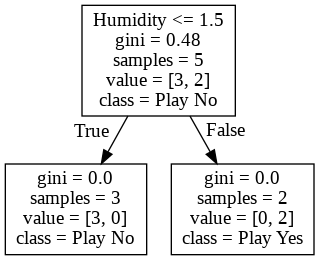

In [ ]:
Image( pydotplus.graph_from_dot_data(dt_dot_data).create_png() )